In [1]:
%reset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #For 3D Plots

#Required by Jupyter for inlining images
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
data = pd.read_csv('../Data/Abort_Gap_B1.txt',sep=' ', header=None)
data.columns = ['Time Stamp','Reading']
#Readings should not exceed 10e-7

In [3]:
data.describe()

,Time Stamp,Reading
count,1.898200e+04,1.898200e+04
mean,1.537150e+09,6.313011e+09
std,1.675229e+06,5.140194e+09
min,1.534476e+09,0.000000e+00
25%,1.535796e+09,2.406413e+09
50%,1.536506e+09,4.823924e+09
75%,1.538614e+09,9.160419e+09
max,1.540021e+09,3.071812e+10


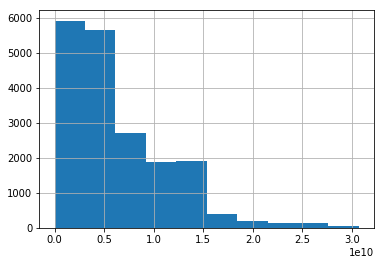

In [4]:
data['Reading'].hist()

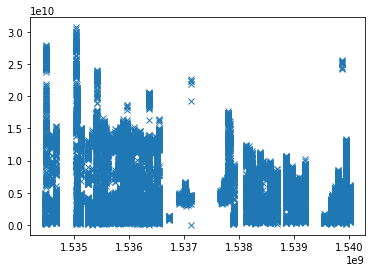

In [5]:
plt.plot(data['Time Stamp'],data['Reading'],'x')

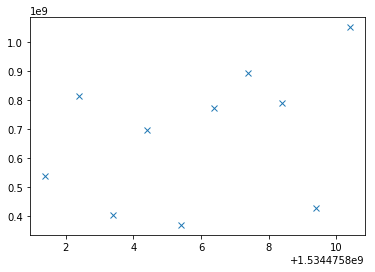

In [3]:
sample = data[:10]
plt.plot(sample['Time Stamp'],sample['Reading'],'x')
#so the abort gap reading increases as more bunches are added

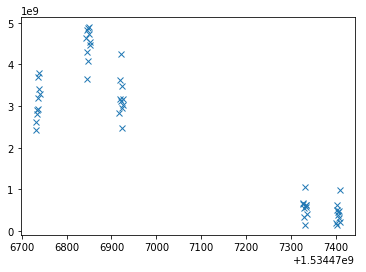

In [9]:
sample = data[50:100]
plt.plot(sample['Time Stamp'],sample['Reading'],'x')

In [10]:
def arrangeData(df):
    #This function will find the row with the maximum sum of each 10s
    #window and store the required data in a new dataframe
    columns = ['Time Stamp', 'Reading']
    resulting_df = pd.DataFrame(columns=columns)
    i = 0
    while i < len(df):
        temp_df = df[i:i+9]
        row = temp_df.loc[temp_df['Reading'].idxmax()]
        resulting_df = resulting_df.append(row,ignore_index=True)
        i = i + 10
    return resulting_df
            

In [11]:
Beam1_AbortGapReadings = arrangeData(data)
Beam1_AbortGapReadings.describe()

,Time Stamp,Reading
count,1.899000e+03,1.899000e+03
mean,1.537149e+09,7.266901e+09
std,1.675996e+06,5.270963e+09
min,1.534476e+09,6.340252e+08
25%,1.535796e+09,3.286410e+09
50%,1.536506e+09,5.770432e+09
75%,1.538614e+09,1.063487e+10
max,1.540021e+09,3.071812e+10


In [12]:
Beam1_AbortGapReadings.to_pickle('../Data/Beam1_AbortGap.pkl')

{'whiskers': [<matplotlib.lines.Line2D at 0x7efbb924b9b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7efbb924beb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efbb924b470>],
 'medians': [<matplotlib.lines.Line2D at 0x7efbb9255a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efbb9255eb8>],
 'means': []}

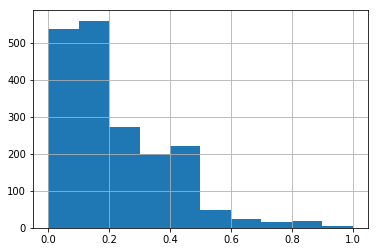

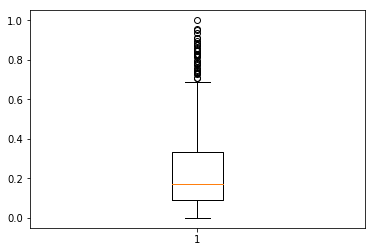

In [19]:
#Normalize the columns so that all values lie between 0 and 1
Beam1_AbortGapReadings['Reading'] = (Beam1_AbortGapReadings['Reading']-min(Beam1_AbortGapReadings['Reading']))/(max(Beam1_AbortGapReadings['Reading'])-min(Beam1_AbortGapReadings['Reading']))
Beam1_AbortGapReadings['Reading'].hist()
plt.figure()
plt.boxplot(Beam1_AbortGapReadings['Reading'])
#Since the distribution of the data is right skewed, the 'outlying' points in the boxplot
#are not necessarily outliers, it would be a good idea to show a more robust adjusted boxplot

In [13]:
#The Above is repeated for beam 2
data = pd.read_csv('../Data/Abort_Gap_B2.txt',sep=' ', header=None)
data.columns = ['Time Stamp','Reading']
data.describe()

,Time Stamp,Reading
count,1.739900e+04,1.739900e+04
mean,1.537181e+09,2.918418e+09
std,1.650725e+06,1.317428e+10
min,1.534476e+09,0.000000e+00
25%,1.535797e+09,3.140965e+08
50%,1.536547e+09,1.021867e+09
75%,1.538572e+09,2.463894e+09
max,1.540021e+09,2.646867e+11


In [14]:
Beam2_AbortGapReadings = arrangeData(data)
Beam2_AbortGapReadings.describe()

,Time Stamp,Reading
count,1.740000e+03,1.740000e+03
mean,1.537181e+09,3.677273e+09
std,1.651122e+06,1.341896e+10
min,1.534476e+09,0.000000e+00
25%,1.535797e+09,9.113947e+08
50%,1.536547e+09,1.843386e+09
75%,1.538572e+09,3.357379e+09
max,1.540021e+09,2.646867e+11


In [15]:
Beam2_AbortGapReadings.to_pickle('../Data/Beam2_AbortGap.pkl')

         Time Stamp      Reading
count  1.740000e+03  1740.000000
mean   1.537181e+09     0.013893
std    1.651122e+06     0.050698
min    1.534476e+09     0.000000
25%    1.535797e+09     0.003443
50%    1.536547e+09     0.006964
75%    1.538572e+09     0.012684
max    1.540021e+09     1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7efbb8eaeda0>,
 'caps': [<matplotlib.lines.Line2D at 0x7efbb8ebb630>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efbb8eae860>],
 'medians': [<matplotlib.lines.Line2D at 0x7efbb8ebbe80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efbb8ebbf60>],
 'means': []}

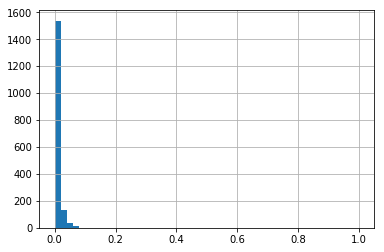

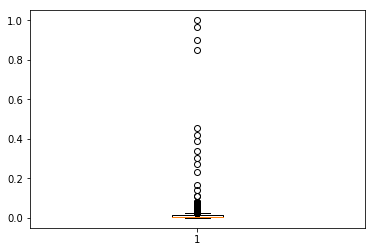

In [26]:
#Normalize the columns so that all values lie between 0 and 1
Beam2_AbortGapReadings['Reading'] = (Beam2_AbortGapReadings['Reading']-min(Beam2_AbortGapReadings['Reading']))/(max(Beam2_AbortGapReadings['Reading'])-min(Beam2_AbortGapReadings['Reading']))
Beam2_AbortGapReadings['Reading'].hist(bins=50)
print(Beam2_AbortGapReadings.describe())
plt.figure()
plt.boxplot(Beam2_AbortGapReadings['Reading'])

## Get MSE of Abort Gap

In [9]:
%reset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #For 3D Plots

#Required by Jupyter for inlining images
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [10]:
data = pd.read_csv('../Data/Abort_Gap_B1.txt',sep=' ', header=None)
data.columns = ['Time Stamp','Reading']

In [11]:
def get_mse(row):
    regression_line = data.iloc[0]
    mse = []
    for i in range(1,len(row)):
        mse.append((regression_line[i]-row[i])**2)
    return np.mean(mse)

In [12]:
data['MSE'] = data.apply(lambda row: get_mse(row), axis=1)

Text(0.5,1,'MSE of Abort Gap')

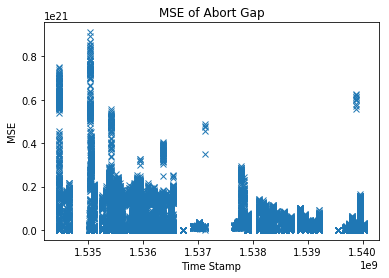

In [13]:
fig = plt.figure()
plt.plot(data['Time Stamp'],data['MSE'],'x')
plt.xlabel('Time Stamp')
plt.ylabel('MSE')
plt.title('MSE of Abort Gap')

Text(0.5,1,'MSE of Abort Gap')

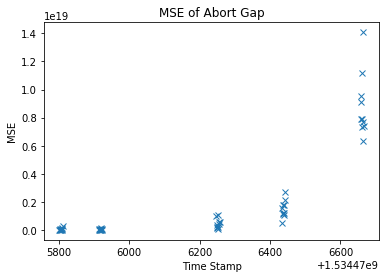

In [14]:
sample = data[:50]
fig = plt.figure()
plt.plot(sample['Time Stamp'],sample['MSE'],'x')
plt.xlabel('Time Stamp')
plt.ylabel('MSE')
plt.title('MSE of Abort Gap')